In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from itertools import permutations
from scipy.spatial import distance
import seaborn as sns

In [3]:
wines = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315',\
              'Proline']

In [4]:
f=pd.read_csv('C:\\Users\\Daniele\\Desktop\\HW 4\\wine.data',names=wines)

In [5]:
pd.DataFrame.drop(f,['Class'],axis=1,inplace=True)

In [6]:
f.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
scaler = StandardScaler()

In [8]:
scaled_array = scaler.fit_transform(f)

In [9]:
scaled_data= pd.DataFrame( scaled_array, columns = f.columns )

In [10]:
scaled_data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [11]:
def Kmeans(array,k):
    
    def initialize_centroids(array,k):
        initial_centroids = np.random.permutation(array.shape[0])[:k]
        centroids = array[initial_centroids]
        return centroids
    
    lis_initial_centroids = initialize_centroids(array,k)
    
    def assign_centroids(array,centroids):
        lis_clustering=[]
        for e in array:
            d_e = []
            for i in range(k):
                d = distance.euclidean(e,centroids[i])
                d_e.append(d)
            min_distance=min(d_e)
            lis_clustering.append((d_e.index(min_distance)+1))
        lis_clustering= np.array(lis_clustering)
        clusters_to_append = lis_clustering.reshape(178,1)   
        new_array = np.append(array,clusters_to_append,axis=1)
        return new_array
    
    new_array = assign_centroids(scaled_array,lis_initial_centroids)
    
    def new_centroids(new_array):
        lis_centroids = []
        centroids = []
        for i in range(k):
            lis_centroids.append([])
        for j in range(178):
            for i in range(k):
                if float(i+1) == new_array[j][13]:
                    lis_centroids[i].append(new_array[j])
        for i in range(k):
            lis_centroid = lis_centroids[i]
            lis_centroid = np.delete(lis_centroid,13,axis=1)
            new_centroid = np.mean(lis_centroid,axis=0)
            centroids.append(new_centroid)
        return centroids
   
    centroids = new_centroids(new_array)
    
    final_array = assign_centroids(scaled_array,centroids)
    
    def update_centroids(initial_centroids):
        centroids_old = np.zeros((k,12))
        centroids = initial_centroids
        numItem = 0
        while ([list(elem) for elem in centroids_old] != [list(elem) for elem in centroids]):
            numItem += 1
            centroids_old = centroids.copy()
            new_array = assign_centroids(scaled_array,centroids_old)
            centroids = new_centroids(new_array)
        return numItem,centroids,centroids_old
    
    numItem = update_centroids(lis_initial_centroids)[0]
    
    centroids = update_centroids(lis_initial_centroids)[1]
    
    final_array = assign_centroids(scaled_array,centroids)
    
    def clustering(array):
        lis_clusters = []
        clusters = []
        for i in range(k):
            lis_clusters.append([])
        for j in range(178):
            for i in range(k):
                if float(i+1) == array[j][13]:
                    lis_clusters[i].append(array[j])
        for i in range(k):
            cluster = lis_clusters[i]
            cluster = np.delete(cluster,13,axis=1)
            clusters.append(cluster)
        return clusters
    
    clusters = clustering(final_array)
    
    def dissimilarity(clusters,centroids):
        Dist = []
        for c in range (len(clusters)):
            Dist_cluster = ([])
            for e in clusters[c]:
                Dist_cluster += [(distance.euclidean(e,centroids[c]))**2]
            Dist += [Dist_cluster]
        final_dist = []
        for e in Dist:
            e = (sum(e))
            final_dist += [e]
        totDist = (sum(final_dist))
        return totDist
    
    totDist = dissimilarity(clusters,centroids)
    
    return totDist,clusters,centroids,final_array

In [12]:
results = Kmeans(scaled_array,3)

In [13]:
results[3]

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893,  3.        ],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152,  3.        ],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818,  3.        ],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  2.        ],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  2.        ],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  2.        ]])

In [14]:
def tryKmeans(rep):
    best = Kmeans(scaled_array,3)
    minDissimilarity = best[0]
    for trial in range(rep):
        result = Kmeans(scaled_array,3)
        currDissimilarity = result[0]
        if currDissimilarity < minDissimilarity:
            best = result
            minDissimilarity = currDissimilarity       
    return best
    

In [15]:
best = tryKmeans(10)

In [16]:
def elbowMethod(rep):
    Tot_dissimilarity = []
    for i in range(1,rep):
        dissimilarity = (Kmeans(scaled_array,i)[0],i)
        Tot_dissimilarity += [dissimilarity]
        
    return Tot_dissimilarity

In [17]:
elbow = elbowMethod(11)

In [18]:
elbow

[(2313.9999999999986, 1),
 (1976.3880289530662, 2),
 (1282.4635183465311, 3),
 (1220.901017585719, 4),
 (1136.5484094869162, 5),
 (1086.1324312113834, 6),
 (1011.8486636252201, 7),
 (978.6617951318042, 8),
 (960.5811957099858, 9),
 (894.9736940219304, 10)]

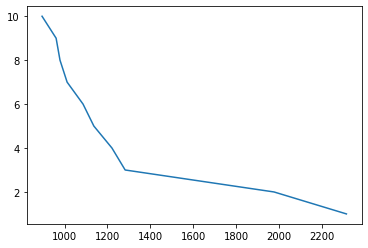

In [19]:
import pylab as pl
X = []
Y = []
for elem in elbow:
    X += [elem[0]]
    Y += [elem[1]]
pl.plot(X, Y)              
pl.show()    

In [21]:
final_cluster = pd.DataFrame(final_cluster,columns = ['cluster'])

In [22]:
final_cluster.head()

,cluster
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0


In [23]:
df = scaled_data.join(final_cluster)

In [24]:
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2.0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2.0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2.0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2.0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2.0


C:\Users\Daniele\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Daniele\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


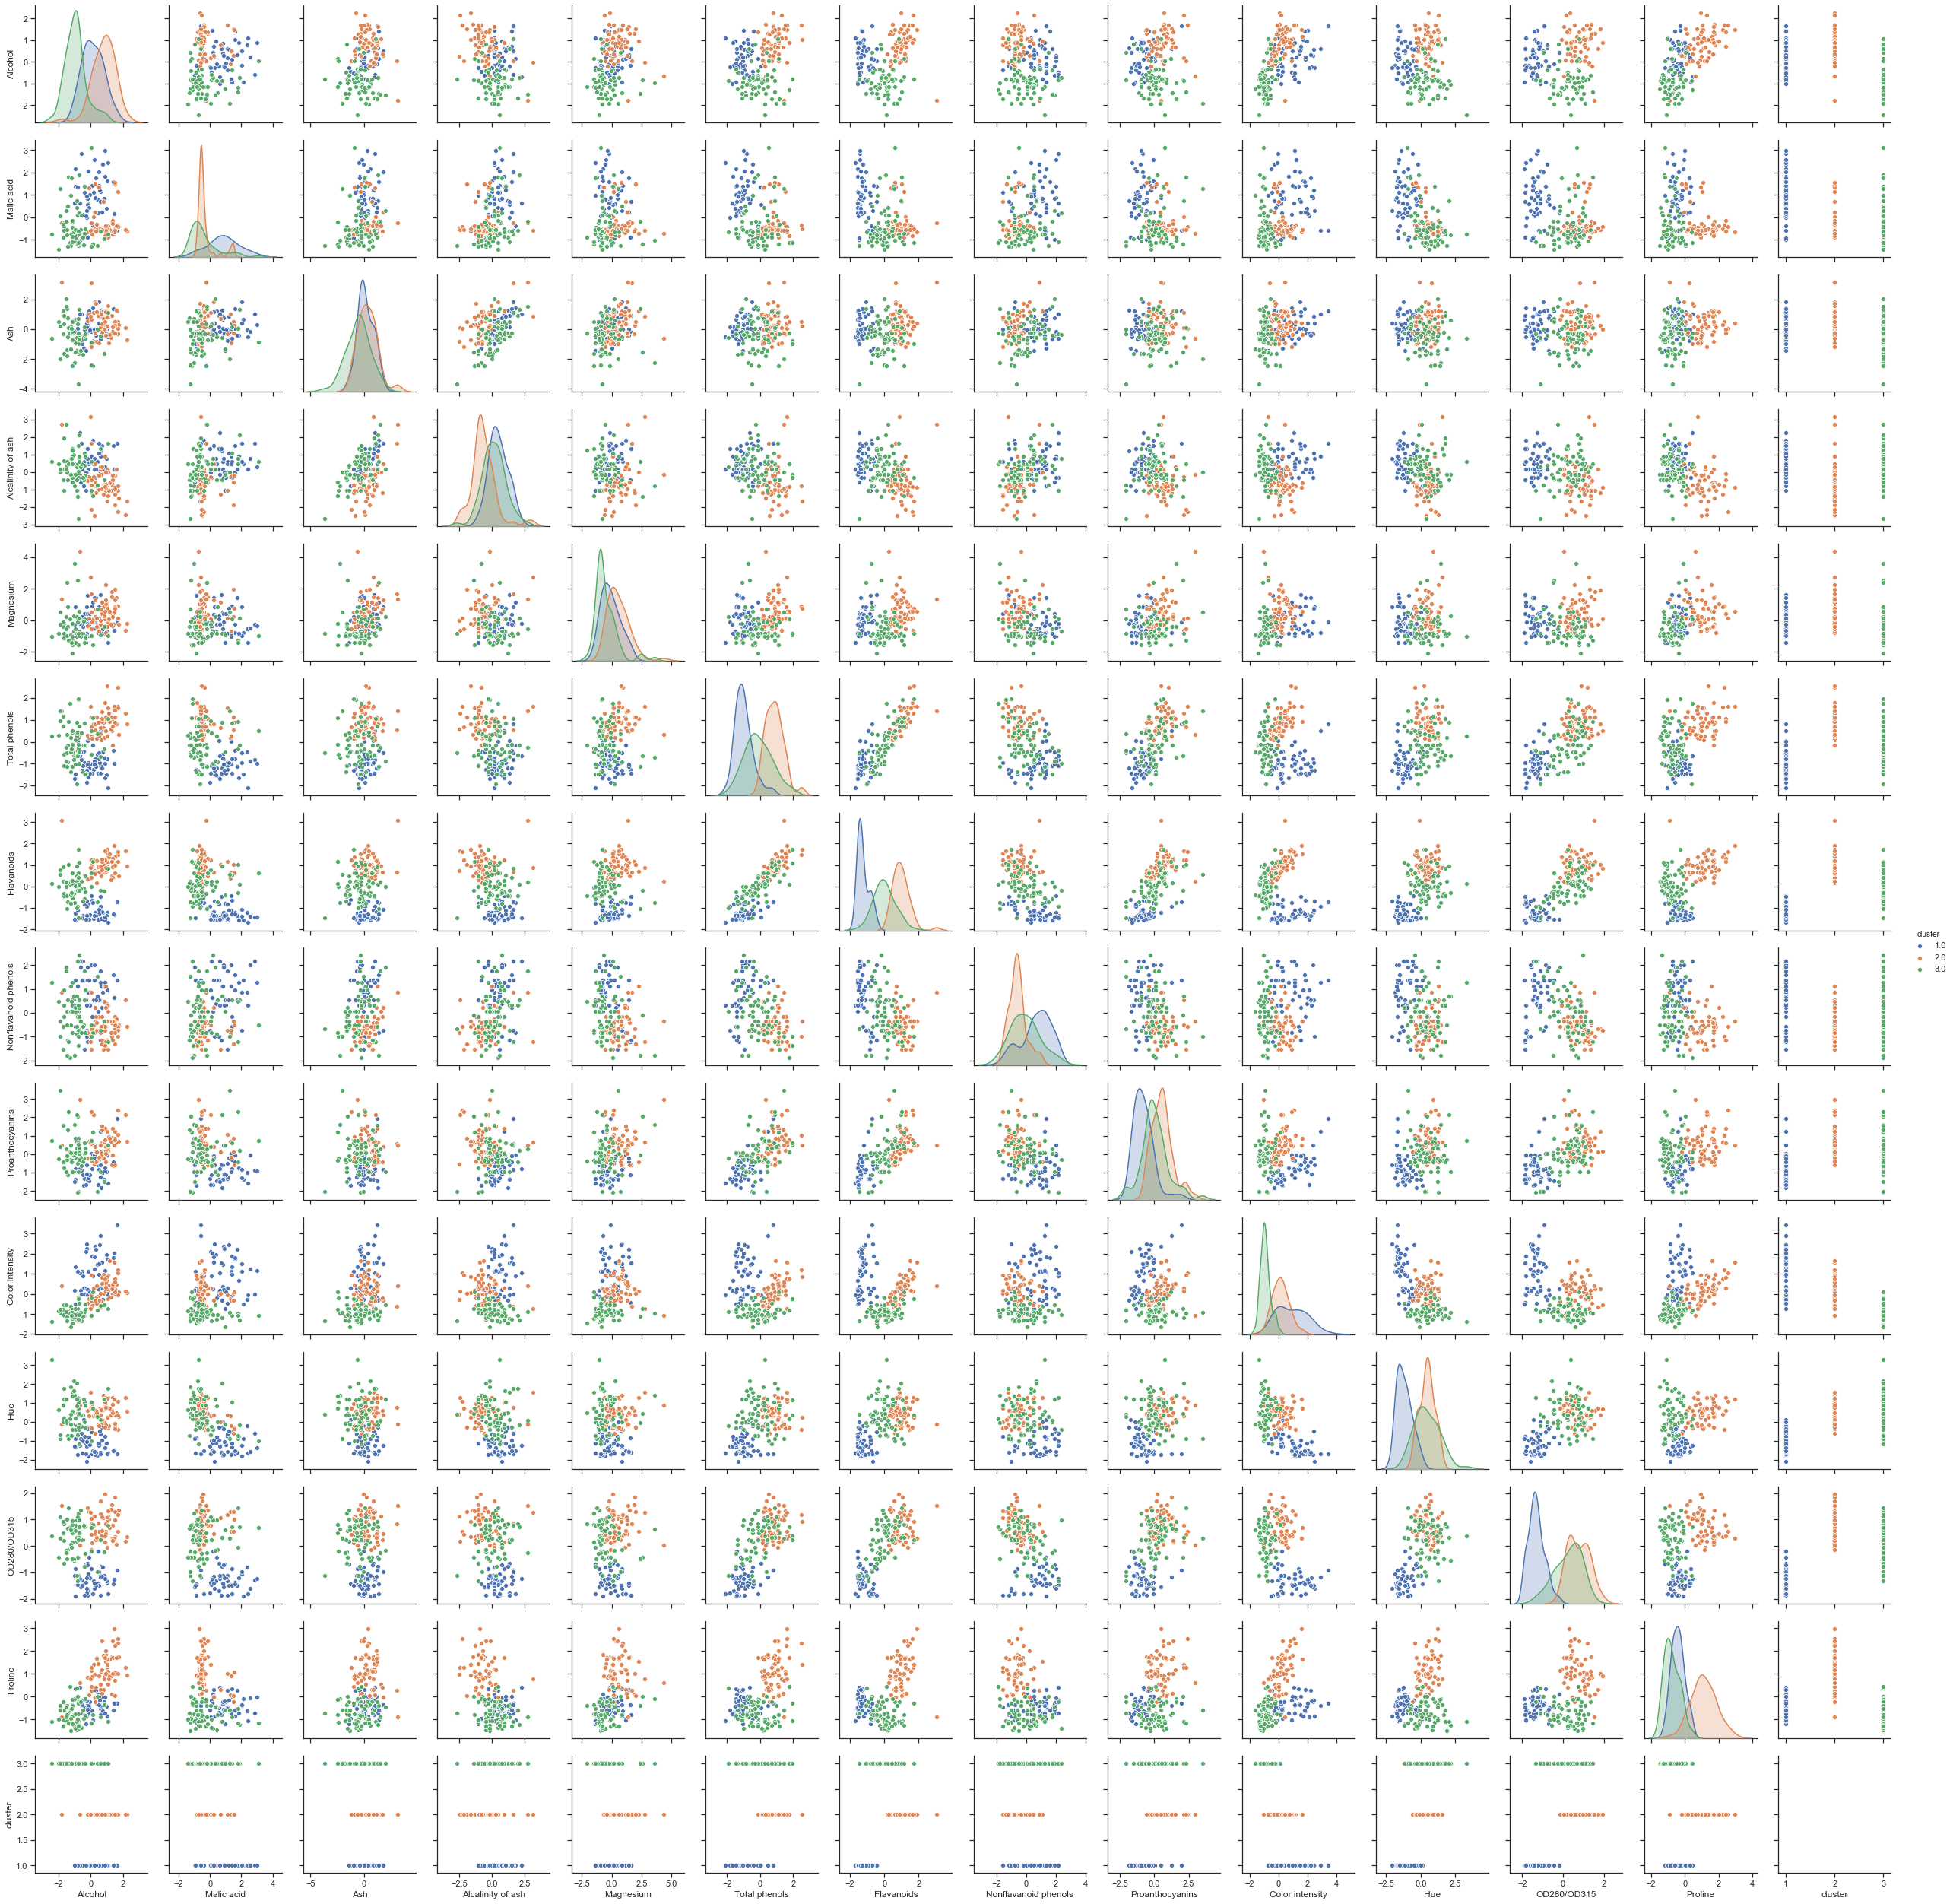

In [25]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,hue = 'cluster')
plt.show()

In [ ]:
def similarity(cluster):
    